# Pendahuluan
Notebook ini bertujuan untuk mengembangkan model *machine learning* yang dapat mengidentifikasi jenis aktivitas di dalam ruangan berdasarkan pembacaan dari berbagai sensor gas. Dataset ini berisi data dari sensor MQ2, MQ9, MQ135, MQ137, MQ138, dan MG-811, serta label aktivitas terkait.

In [2]:
## Langkah 1: Mengimpor Library
# Bagian ini mengimpor semua *library* Python yang diperlukan untuk analisis data, visualisasi, dan pembangunan model *machine learning*.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
## Langkah 2: Memuat Dataset
# Dataset dimuat dari file CSV dan kolom-kolom diberi nama yang sesuai untuk kemudahan analisis.
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/air-quality/air-quality.csv', header=None)
data.columns = ['MQ2', 'MQ9', 'MQ135', 'MQ137', 'MQ138', 'MG_811', 'Activity']

In [5]:
print("Ukuran data:", data.shape)
print("\n5 Baris Pertama Dataset:")
print(data.head())

Ukuran data: (1845, 7)

5 Baris Pertama Dataset:
   MQ2  MQ9  MQ135  MQ137  MQ138  MG_811  Activity
0  670  696   1252   1720   1321    2431         4
1  641  674   1156   1652   1410    2433         4
2  642  646   1159   1643   1455    2361         4
3  640  590   1105   1608   1459    2427         4
4  616  627   1192   1637   1466    2447         4


# Eksplorasi Data (EDA)

In [6]:
### Informasi dan Statistik Deskriptif Dataset
# Bagian ini memberikan gambaran umum tentang dataset, termasuk tipe data setiap kolom dan statistik deskriptifnya.
print("\nInformasi Dataset:")
print(data.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   MQ2       1845 non-null   int64
 1   MQ9       1845 non-null   int64
 2   MQ135     1845 non-null   int64
 3   MQ137     1845 non-null   int64
 4   MQ138     1845 non-null   int64
 5   MG_811    1845 non-null   int64
 6   Activity  1845 non-null   int64
dtypes: int64(7)
memory usage: 101.0 KB
None


In [7]:
print("\nStatistik Deskriptif:")
print(data.describe())


Statistik Deskriptif:
               MQ2          MQ9        MQ135        MQ137        MQ138  \
count  1845.000000  1845.000000  1845.000000  1845.000000  1845.000000   
mean    587.458537   653.465583  1166.036856  1609.279675  1302.121951   
std     190.456217   173.360131   208.791130   118.820436   279.456215   
min     263.000000   346.000000   753.000000  1323.000000   773.000000   
25%     430.000000   517.000000   995.000000  1508.000000  1086.000000   
50%     551.000000   622.000000  1162.000000  1610.000000  1264.000000   
75%     713.000000   746.000000  1309.000000  1693.000000  1553.000000   
max    1266.000000  1388.000000  1738.000000  1926.000000  1948.000000   

            MG_811     Activity  
count  1845.000000  1845.000000  
mean   2246.295935     2.368564  
std     181.001073     1.209905  
min    1797.000000     1.000000  
25%    2137.000000     1.000000  
50%    2265.000000     2.000000  
75%    2372.000000     4.000000  
max    2703.000000     4.000000  


In [8]:
### Analisis Distribusi Label (Activity)
# Distribusi kelas 'Activity' divisualisasikan untuk memahami sebaran aktivitas dalam dataset.
print("\nDistribusi Label:")
print(data['Activity'].value_counts())


Distribusi Label:
Activity
1    595
4    540
2    515
3    195
Name: count, dtype: int64


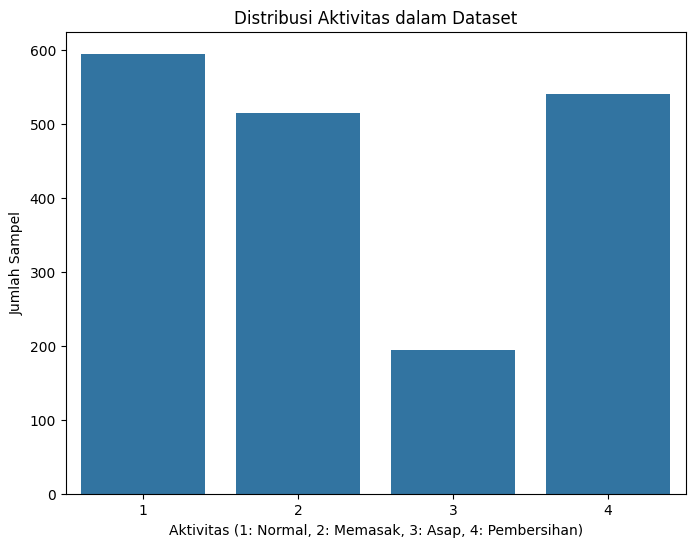

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Activity', data=data)
plt.title('Distribusi Aktivitas dalam Dataset')
plt.xlabel('Aktivitas (1: Normal, 2: Memasak, 3: Asap, 4: Pembersihan)')
plt.ylabel('Jumlah Sampel')
plt.show()

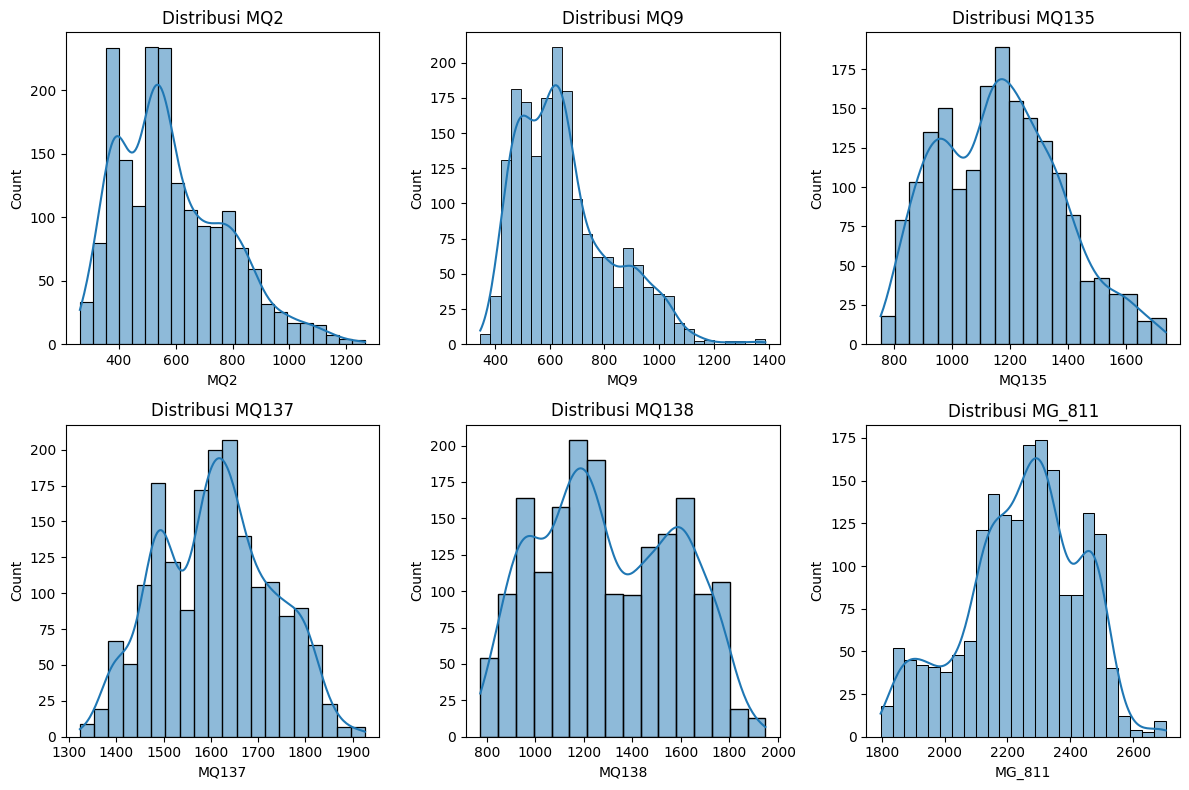

In [10]:
### Analisis Distribusi Fitur Sensor
# Histogram digunakan untuk memvisualisasikan distribusi masing-masing fitur sensor, memberikan wawasan tentang pola data dan potensi masalah seperti *skewness*.
plt.figure(figsize=(12, 8))
for i, column in enumerate(['MQ2', 'MQ9', 'MQ135', 'MQ137', 'MQ138', 'MG_811'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

In [11]:
print("\nRingkasan Distribusi Fitur:")
for column in ['MQ2', 'MQ9', 'MQ135', 'MQ137', 'MQ138', 'MG_811']:
    print(f"\nFitur: {column}")
    print(f"Rata-rata: {data[column].mean():.2f}")
    print(f"Standar Deviasi: {data[column].std():.2f}")
    print(f"Nilai Minimum: {data[column].min()}")
    print(f"Nilai Maksimum: {data[column].max()}")
    print(f"Q1 (25%): {data[column].quantile(0.25):.2f}")
    print(f"Median (50%): {data[column].quantile(0.50):.2f}")
    print(f"Q3 (75%): {data[column].quantile(0.75):.2f}")


Ringkasan Distribusi Fitur:

Fitur: MQ2
Rata-rata: 587.46
Standar Deviasi: 190.46
Nilai Minimum: 263
Nilai Maksimum: 1266
Q1 (25%): 430.00
Median (50%): 551.00
Q3 (75%): 713.00

Fitur: MQ9
Rata-rata: 653.47
Standar Deviasi: 173.36
Nilai Minimum: 346
Nilai Maksimum: 1388
Q1 (25%): 517.00
Median (50%): 622.00
Q3 (75%): 746.00

Fitur: MQ135
Rata-rata: 1166.04
Standar Deviasi: 208.79
Nilai Minimum: 753
Nilai Maksimum: 1738
Q1 (25%): 995.00
Median (50%): 1162.00
Q3 (75%): 1309.00

Fitur: MQ137
Rata-rata: 1609.28
Standar Deviasi: 118.82
Nilai Minimum: 1323
Nilai Maksimum: 1926
Q1 (25%): 1508.00
Median (50%): 1610.00
Q3 (75%): 1693.00

Fitur: MQ138
Rata-rata: 1302.12
Standar Deviasi: 279.46
Nilai Minimum: 773
Nilai Maksimum: 1948
Q1 (25%): 1086.00
Median (50%): 1264.00
Q3 (75%): 1553.00

Fitur: MG_811
Rata-rata: 2246.30
Standar Deviasi: 181.00
Nilai Minimum: 1797
Nilai Maksimum: 2703
Q1 (25%): 2137.00
Median (50%): 2265.00
Q3 (75%): 2372.00


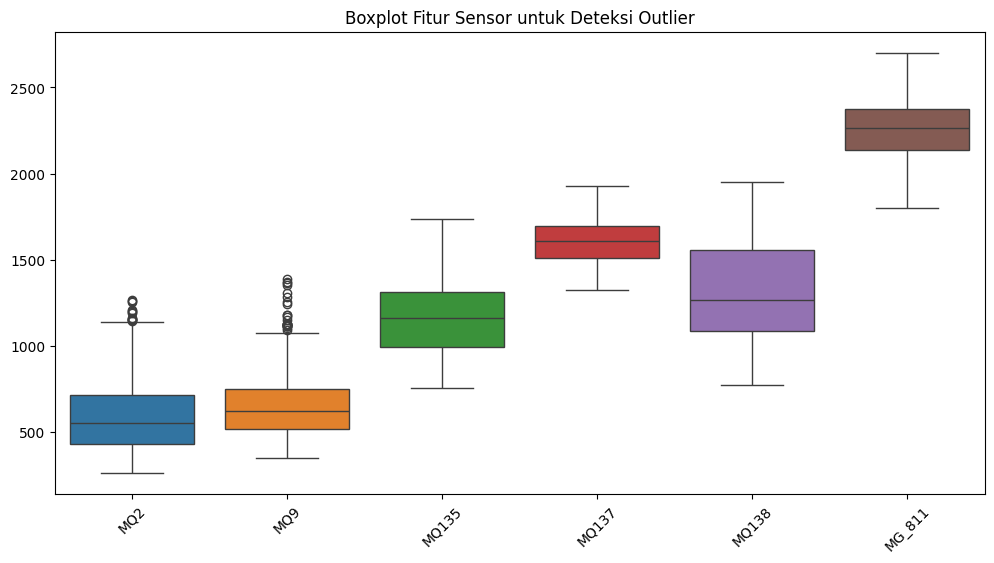

In [12]:
### Deteksi Outlier
# Boxplot dan metode IQR digunakan untuk mengidentifikasi *outlier* dalam fitur sensor, yang dapat mempengaruhi kinerja model.
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop('Activity', axis=1))
plt.title('Boxplot Fitur Sensor untuk Deteksi Outlier')
plt.xticks(rotation=45)
plt.show()

In [13]:
print("\nDeteksi Outlier (Berdasarkan IQR):")
for column in ['MQ2', 'MQ9', 'MQ135', 'MQ137', 'MQ138', 'MG_811']:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    print(f"\nFitur: {column}")
    print(f"Batas bawah (Q1 - 1.5*IQR): {lower_bound:.2f}")
    print(f"Batas atas (Q3 + 1.5*IQR): {upper_bound:.2f}")
    print(f"Jumlah outlier: {len(outliers)}")
    if len(outliers) > 0:
        print(f"Contoh nilai outlier: {outliers.head().to_list()}")


Deteksi Outlier (Berdasarkan IQR):

Fitur: MQ2
Batas bawah (Q1 - 1.5*IQR): 5.50
Batas atas (Q3 + 1.5*IQR): 1137.50
Jumlah outlier: 13
Contoh nilai outlier: [1193, 1266, 1151, 1204, 1258]

Fitur: MQ9
Batas bawah (Q1 - 1.5*IQR): 173.50
Batas atas (Q3 + 1.5*IQR): 1089.50
Jumlah outlier: 24
Contoh nilai outlier: [1119, 1105, 1168, 1150, 1127]

Fitur: MQ135
Batas bawah (Q1 - 1.5*IQR): 524.00
Batas atas (Q3 + 1.5*IQR): 1780.00
Jumlah outlier: 0

Fitur: MQ137
Batas bawah (Q1 - 1.5*IQR): 1230.50
Batas atas (Q3 + 1.5*IQR): 1970.50
Jumlah outlier: 0

Fitur: MQ138
Batas bawah (Q1 - 1.5*IQR): 385.50
Batas atas (Q3 + 1.5*IQR): 2253.50
Jumlah outlier: 0

Fitur: MG_811
Batas bawah (Q1 - 1.5*IQR): 1784.50
Batas atas (Q3 + 1.5*IQR): 2724.50
Jumlah outlier: 0


In [14]:
### Analisis Korelasi Antar Sensor
# Matriks korelasi dan *heatmap* divisualisasikan untuk memahami hubungan antara fitur-fitur sensor, membantu dalam identifikasi fitur yang sangat berkorelasi.
# Jika ada korelasi tinggi antar sensor, kita perlu mempertimbangkan untuk menghapus salah satunya karena bisa menyebabkan masalah multikolinieritas.
corr_matrix = data.drop('Activity', axis=1).corr()

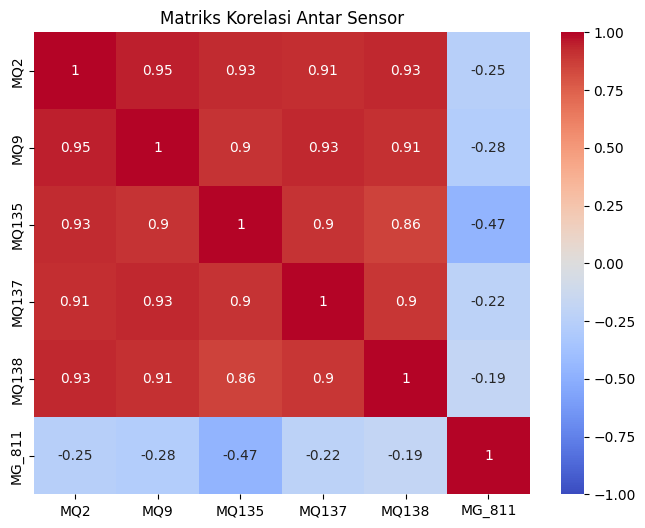

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriks Korelasi Antar Sensor')
plt.show()

In [16]:
print("\nMatriks Korelasi Antar Fitur:")
for i, col1 in enumerate(corr_matrix.columns):
    for col2 in corr_matrix.columns[i+1:]:
        corr_value = corr_matrix.loc[col1, col2]
        print(f"Korelasi {col1} - {col2}: {corr_value:.3f}")
        if abs(corr_value) > 0.8:
            print(f"  -> Korelasi tinggi! Pertimbangkan menghapus salah satu fitur.")


Matriks Korelasi Antar Fitur:
Korelasi MQ2 - MQ9: 0.947
  -> Korelasi tinggi! Pertimbangkan menghapus salah satu fitur.
Korelasi MQ2 - MQ135: 0.928
  -> Korelasi tinggi! Pertimbangkan menghapus salah satu fitur.
Korelasi MQ2 - MQ137: 0.915
  -> Korelasi tinggi! Pertimbangkan menghapus salah satu fitur.
Korelasi MQ2 - MQ138: 0.934
  -> Korelasi tinggi! Pertimbangkan menghapus salah satu fitur.
Korelasi MQ2 - MG_811: -0.253
Korelasi MQ9 - MQ135: 0.904
  -> Korelasi tinggi! Pertimbangkan menghapus salah satu fitur.
Korelasi MQ9 - MQ137: 0.934
  -> Korelasi tinggi! Pertimbangkan menghapus salah satu fitur.
Korelasi MQ9 - MQ138: 0.909
  -> Korelasi tinggi! Pertimbangkan menghapus salah satu fitur.
Korelasi MQ9 - MG_811: -0.279
Korelasi MQ135 - MQ137: 0.900
  -> Korelasi tinggi! Pertimbangkan menghapus salah satu fitur.
Korelasi MQ135 - MQ138: 0.858
  -> Korelasi tinggi! Pertimbangkan menghapus salah satu fitur.
Korelasi MQ135 - MG_811: -0.473
Korelasi MQ137 - MQ138: 0.896
  -> Korelasi tin

# Pra-pemrosesan Data (Preprocessing) - Skenario 1: Menggunakan Semua Fitur

In [17]:
### Langkah 1: Memisahkan Fitur dan Label
# Fitur (X) dan label (y) dipisahkan dari dataset untuk persiapan pelatihan model.
X_full = data.drop('Activity', axis=1)
y_full = data['Activity']

In [18]:
print("\nFitur (X) - 5 Baris Pertama (Skenario 1):\n", X_full.head())
print("\nLabel (y) - 5 Baris Pertama (Skenario 1):\n", y_full.head())
print("\nJumlah fitur (Skenario 1):", X_full.shape[1])
print("Jumlah sampel (Skenario 1):", X_full.shape[0])


Fitur (X) - 5 Baris Pertama (Skenario 1):
    MQ2  MQ9  MQ135  MQ137  MQ138  MG_811
0  670  696   1252   1720   1321    2431
1  641  674   1156   1652   1410    2433
2  642  646   1159   1643   1455    2361
3  640  590   1105   1608   1459    2427
4  616  627   1192   1637   1466    2447

Label (y) - 5 Baris Pertama (Skenario 1):
 0    4
1    4
2    4
3    4
4    4
Name: Activity, dtype: int64

Jumlah fitur (Skenario 1): 6
Jumlah sampel (Skenario 1): 1845


In [19]:
### Langkah 2: Membagi Data Pelatihan dan Pengujian
# Data dibagi menjadi set pelatihan (80%) dan pengujian (20%) untuk melatih dan mengevaluasi model secara efektif. `random_state` diatur untuk memastikan reproduktifitas.
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

In [20]:
print("\nPembagian Data (Skenario 1):")
print(f"Jumlah sampel pelatihan: {X_train_full.shape[0]} ({X_train_full.shape[0]/X_full.shape[0]*100:.1f}%)")
print(f"Jumlah sampel pengujian: {X_test_full.shape[0]} ({X_test_full.shape[0]/X_full.shape[0]*100:.1f}%)")


Pembagian Data (Skenario 1):
Jumlah sampel pelatihan: 1476 (80.0%)
Jumlah sampel pengujian: 369 (20.0%)


In [21]:
print("\nDistribusi Label di Data Pelatihan (Skenario 1):")
label_counts_train_full = y_train_full.value_counts().sort_index()
activity_map = {1: 'Normal', 2: 'Memasak', 3: 'Asap', 4: 'Pembersihan'}
for label, count in label_counts_train_full.items():
    print(f"Aktivitas {label} ({activity_map[label]}): {count} sampel ({count/X_train_full.shape[0]*100:.1f}%)")


Distribusi Label di Data Pelatihan (Skenario 1):
Aktivitas 1 (Normal): 459 sampel (31.1%)
Aktivitas 2 (Memasak): 414 sampel (28.0%)
Aktivitas 3 (Asap): 163 sampel (11.0%)
Aktivitas 4 (Pembersihan): 440 sampel (29.8%)


In [22]:
### Langkah 3: Standardisasi Fitur
# Fitur distandardisasi menggunakan `StandardScaler` untuk memastikan semua fitur memiliki skala yang seragam, yang penting untuk banyak algoritma *machine learning*.
scaler_full = StandardScaler()
X_train_scaled_full = scaler_full.fit_transform(X_train_full)
X_test_scaled_full = scaler_full.transform(X_test_full)

In [23]:
X_train_scaled_df_full = pd.DataFrame(X_train_scaled_full, columns=X_full.columns)
X_test_scaled_df_full = pd.DataFrame(X_test_scaled_full, columns=X_full.columns)

In [24]:
print("\nStatistik Fitur Pelatihan Setelah Standardisasi (Skenario 1):\n", X_train_scaled_df_full.describe().round(2))


Statistik Fitur Pelatihan Setelah Standardisasi (Skenario 1):
            MQ2      MQ9    MQ135    MQ137    MQ138   MG_811
count  1476.00  1476.00  1476.00  1476.00  1476.00  1476.00
mean     -0.00    -0.00     0.00    -0.00    -0.00     0.00
std       1.00     1.00     1.00     1.00     1.00     1.00
min      -1.72    -1.80    -1.94    -2.35    -1.92    -2.46
25%      -0.82    -0.79    -0.83    -0.84    -0.77    -0.61
50%      -0.19    -0.18    -0.03     0.00    -0.13     0.11
75%       0.66     0.53     0.68     0.69     0.89     0.68
max       3.51     4.24     2.73     2.66     2.30     2.51


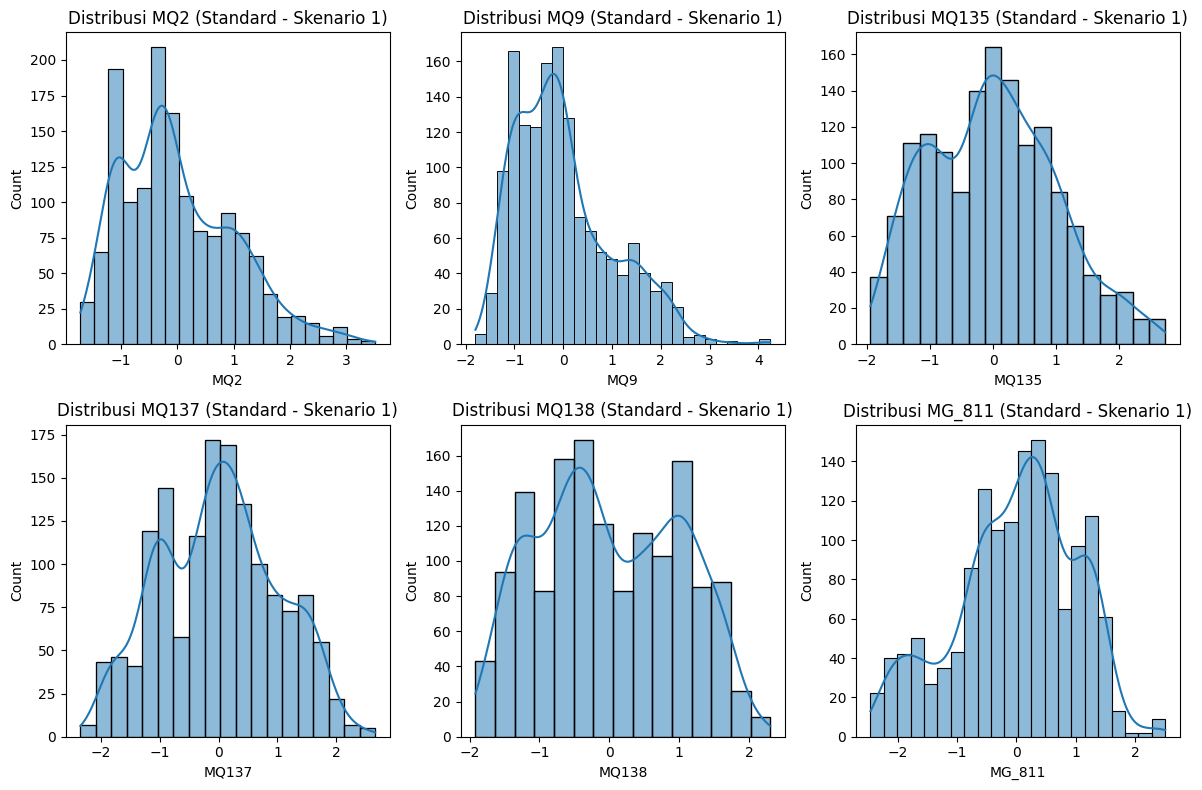

In [25]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(X_full.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(X_train_scaled_df_full[column], kde=True)
    plt.title(f'Distribusi {column} (Standard - Skenario 1)')
plt.tight_layout()
plt.show()

In [26]:
print("\nRingkasan Distribusi Fitur Pelatihan Setelah Standardisasi (Skenario 1):")
for column in X_full.columns:
    print(f"\nFitur: {column}")
    print(f"Rata-rata: {X_train_scaled_df_full[column].mean():.2f}")
    print(f"Standar Deviasi: {X_train_scaled_df_full[column].std():.2f}")


Ringkasan Distribusi Fitur Pelatihan Setelah Standardisasi (Skenario 1):

Fitur: MQ2
Rata-rata: -0.00
Standar Deviasi: 1.00

Fitur: MQ9
Rata-rata: -0.00
Standar Deviasi: 1.00

Fitur: MQ135
Rata-rata: 0.00
Standar Deviasi: 1.00

Fitur: MQ137
Rata-rata: -0.00
Standar Deviasi: 1.00

Fitur: MQ138
Rata-rata: -0.00
Standar Deviasi: 1.00

Fitur: MG_811
Rata-rata: 0.00
Standar Deviasi: 1.00


# Modeling - Skenario 1: Menggunakan Semua Fitur

In [27]:
### Langkah 4: Pelatihan Model Random Forest
# Model *Random Forest Classifier* diinisialisasi dan dilatih menggunakan data pelatihan yang sudah distandardisasi. `class_weight='balanced'` digunakan untuk menangani ketidakseimbangan kelas. Model ini diberi nama `model_scenario1`.
model_scenario1 = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model_scenario1.fit(X_train_scaled_full, y_train_full)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [28]:
y_pred_scenario1 = model_scenario1.predict(X_test_scaled_full)

In [29]:
accuracy_scenario1 = accuracy_score(y_test_full, y_pred_scenario1)
print("\nAkurasi Model (Skenario 1 - Semua Fitur):", round(accuracy_scenario1, 3))


Akurasi Model (Skenario 1 - Semua Fitur): 0.962


In [30]:
### Langkah 5: Evaluasi Model dengan Confusion Matrix
# Kinerja model dievaluasi menggunakan *classification report* dan *confusion matrix*, yang memberikan metrik seperti presisi, *recall*, dan F1-score untuk setiap kelas.
print("\nLaporan Klasifikasi (Skenario 1 - Semua Fitur):")
class_names = ['Normal', 'Memasak', 'Asap', 'Pembersihan']
print(classification_report(y_test_full, y_pred_scenario1, target_names=class_names))


Laporan Klasifikasi (Skenario 1 - Semua Fitur):
              precision    recall  f1-score   support

      Normal       0.98      0.97      0.97       136
     Memasak       0.95      0.95      0.95       101
        Asap       0.94      0.94      0.94        32
 Pembersihan       0.96      0.97      0.97       100

    accuracy                           0.96       369
   macro avg       0.96      0.96      0.96       369
weighted avg       0.96      0.96      0.96       369



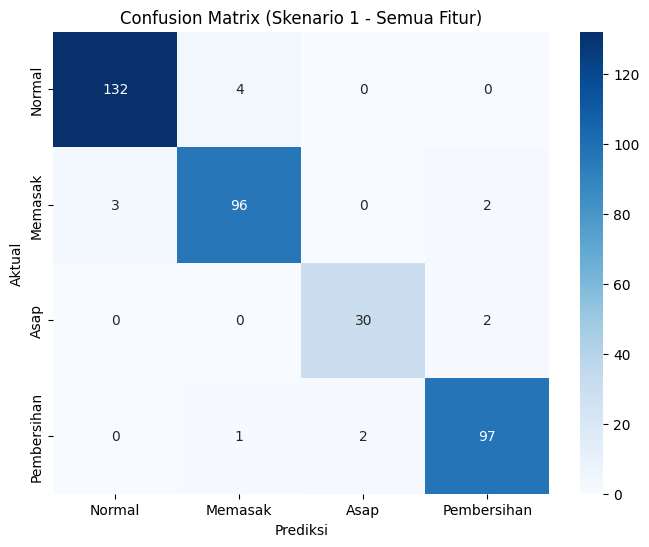

In [31]:
cm_scenario1 = confusion_matrix(y_test_full, y_pred_scenario1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_scenario1, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Skenario 1 - Semua Fitur)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [32]:
print("\nConfusion Matrix (Skenario 1 - Semua Fitur):")
print("Kolom: Prediksi (Normal, Memasak, Asap, Pembersihan)")
print("Baris: Aktual (Normal, Memasak, Asap, Pembersihan)")
print(cm_scenario1)
for i, actual in enumerate(class_names):
    print(f"\nAktual: {actual}")
    for j, predicted in enumerate(class_names):
        print(f"  Prediksi {predicted}: {cm_scenario1[i][j]} sampel")


Confusion Matrix (Skenario 1 - Semua Fitur):
Kolom: Prediksi (Normal, Memasak, Asap, Pembersihan)
Baris: Aktual (Normal, Memasak, Asap, Pembersihan)
[[132   4   0   0]
 [  3  96   0   2]
 [  0   0  30   2]
 [  0   1   2  97]]

Aktual: Normal
  Prediksi Normal: 132 sampel
  Prediksi Memasak: 4 sampel
  Prediksi Asap: 0 sampel
  Prediksi Pembersihan: 0 sampel

Aktual: Memasak
  Prediksi Normal: 3 sampel
  Prediksi Memasak: 96 sampel
  Prediksi Asap: 0 sampel
  Prediksi Pembersihan: 2 sampel

Aktual: Asap
  Prediksi Normal: 0 sampel
  Prediksi Memasak: 0 sampel
  Prediksi Asap: 30 sampel
  Prediksi Pembersihan: 2 sampel

Aktual: Pembersihan
  Prediksi Normal: 0 sampel
  Prediksi Memasak: 1 sampel
  Prediksi Asap: 2 sampel
  Prediksi Pembersihan: 97 sampel


# Pra-pemrosesan Data (Preprocessing) - Skenario 2: Fitur yang Sangat Berkorelasi Dihapus

In [33]:
# Mengembalikan dataset asli untuk penghapusan fitur.
# Catatan: Karena 'data' sudah dimodifikasi pada skenario 1, kita perlu memuat ulang dataset asli atau membuatnya menjadi salinan di awal.
# Untuk tujuan demonstrasi, kita akan memuat ulang data_awal.
data_awal = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/air-quality/air-quality.csv', header=None)
data_awal.columns = ['MQ2', 'MQ9', 'MQ135', 'MQ137', 'MQ138', 'MG_811', 'Activity']

In [34]:
### Langkah 1: Penghapusan Fitur
# Fitur-fitur yang menunjukkan korelasi tinggi (MQ9, MQ135, MQ137, MQ138) dihapus untuk mengurangi redundansi dan potensi multikolinieritas. Hanya MQ2 dan MG_811 yang dipertahankan sebagai fitur sensor, selain 'Activity'.
data_reduced = data_awal.drop(['MQ9', 'MQ135', 'MQ137', 'MQ138'], axis=1)

In [35]:
print("\nSetelah Menghapus Fitur MQ9, MQ135, MQ137, MQ138 (Skenario 2):\n", data_reduced.head())
print("Kolom yang tersisa:", list(data_reduced.columns))
print("Jumlah kolom:", data_reduced.shape[1])


Setelah Menghapus Fitur MQ9, MQ135, MQ137, MQ138 (Skenario 2):
    MQ2  MG_811  Activity
0  670    2431         4
1  641    2433         4
2  642    2361         4
3  640    2427         4
4  616    2447         4
Kolom yang tersisa: ['MQ2', 'MG_811', 'Activity']
Jumlah kolom: 3


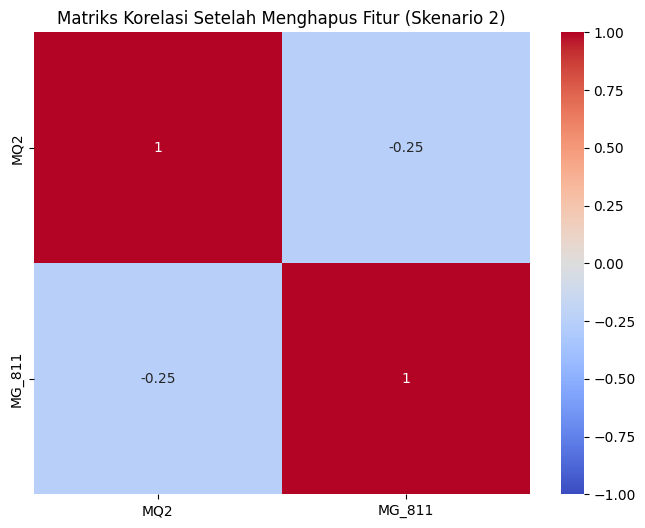

In [36]:
# Matriks korelasi dan *heatmap* divisualisasikan lagi untuk fitur yang tersisa untuk mengkonfirmasi pengurangan korelasi.
corr_matrix_reduced = data_reduced.drop('Activity', axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_reduced, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriks Korelasi Setelah Menghapus Fitur (Skenario 2)')
plt.show()

In [37]:
print("\nMatriks Korelasi Setelah Menghapus MQ9, MQ135, MQ137, MQ138 (Skenario 2):")
for i, col1 in enumerate(corr_matrix_reduced.columns):
    for col2 in corr_matrix_reduced.columns[i+1:]:
        corr_value = corr_matrix_reduced.loc[col1, col2]
        print(f"Korelasi {col1} - {col2}: {corr_value:.3f}")
        if abs(corr_value) > 0.8:
            print(f"  -> Korelasi tinggi! Pertimbangkan menghapus salah satu fitur.")


Matriks Korelasi Setelah Menghapus MQ9, MQ135, MQ137, MQ138 (Skenario 2):
Korelasi MQ2 - MG_811: -0.253


In [38]:
### Langkah 2: Memisahkan Fitur dan Label (Setelah Penghapusan Fitur)
# Fitur (X) dan label (y) dipisahkan dari dataset yang telah dimodifikasi.
X_reduced = data_reduced.drop('Activity', axis=1)
y_reduced = data_reduced['Activity']

In [39]:
print("\nFitur (X) - 5 Baris Pertama (Skenario 2):\n", X_reduced.head())
print("\nLabel (y) - 5 Baris Pertama (Skenario 2):\n", y_reduced.head())
print("\nJumlah fitur (Skenario 2):", X_reduced.shape[1])
print("Jumlah sampel (Skenario 2):", X_reduced.shape[0])


Fitur (X) - 5 Baris Pertama (Skenario 2):
    MQ2  MG_811
0  670    2431
1  641    2433
2  642    2361
3  640    2427
4  616    2447

Label (y) - 5 Baris Pertama (Skenario 2):
 0    4
1    4
2    4
3    4
4    4
Name: Activity, dtype: int64

Jumlah fitur (Skenario 2): 2
Jumlah sampel (Skenario 2): 1845


In [40]:
### Langkah 3: Membagi Data Pelatihan dan Pengujian (Setelah Penghapusan Fitur)
# Data sekali lagi dibagi menjadi set pelatihan dan pengujian, memastikan konsistensi dengan skenario sebelumnya.
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

In [41]:
print("\nPembagian Data (Skenario 2):")
print(f"Jumlah sampel pelatihan: {X_train_reduced.shape[0]} ({X_train_reduced.shape[0]/X_reduced.shape[0]*100:.1f}%)")
print(f"Jumlah sampel pengujian: {X_test_reduced.shape[0]} ({X_test_reduced.shape[0]/X_reduced.shape[0]*100:.1f}%)")


Pembagian Data (Skenario 2):
Jumlah sampel pelatihan: 1476 (80.0%)
Jumlah sampel pengujian: 369 (20.0%)


In [42]:
print("\nDistribusi Label di Data Pelatihan (Skenario 2):")
label_counts_train_reduced = y_train_reduced.value_counts().sort_index()
activity_map = {1: 'Normal', 2: 'Memasak', 3: 'Asap', 4: 'Pembersihan'}
for label, count in label_counts_train_reduced.items():
    print(f"Aktivitas {label} ({activity_map[label]}): {count} sampel ({count/X_train_reduced.shape[0]*100:.1f}%)")


Distribusi Label di Data Pelatihan (Skenario 2):
Aktivitas 1 (Normal): 459 sampel (31.1%)
Aktivitas 2 (Memasak): 414 sampel (28.0%)
Aktivitas 3 (Asap): 163 sampel (11.0%)
Aktivitas 4 (Pembersihan): 440 sampel (29.8%)


In [43]:
### Langkah 4: Standardisasi Fitur (Setelah Penghapusan Fitur)
# Fitur yang tersisa distandardisasi untuk persiapan pelatihan model.
scaler_reduced = StandardScaler()
X_train_scaled_reduced = scaler_reduced.fit_transform(X_train_reduced)
X_test_scaled_reduced = scaler_reduced.transform(X_test_reduced)

In [44]:
X_train_scaled_df_reduced = pd.DataFrame(X_train_scaled_reduced, columns=X_reduced.columns)
X_test_scaled_df_reduced = pd.DataFrame(X_test_scaled_reduced, columns=X_reduced.columns)

In [45]:
print("\nStatistik Fitur Pelatihan Setelah Standardisasi (Skenario 2):\n", X_train_scaled_df_reduced.describe().round(2))


Statistik Fitur Pelatihan Setelah Standardisasi (Skenario 2):
            MQ2   MG_811
count  1476.00  1476.00
mean     -0.00     0.00
std       1.00     1.00
min      -1.72    -2.46
25%      -0.82    -0.61
50%      -0.19     0.11
75%       0.66     0.68
max       3.51     2.51


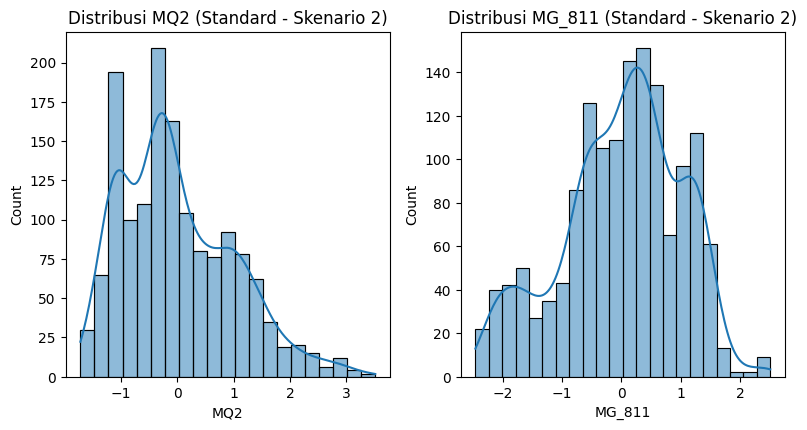

In [46]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(X_reduced.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(X_train_scaled_df_reduced[column], kde=True)
    plt.title(f'Distribusi {column} (Standard - Skenario 2)')
plt.tight_layout()
plt.show()

In [47]:
print("\nRingkasan Distribusi Fitur Pelatihan Setelah Standardisasi (Skenario 2):")
for column in X_reduced.columns:
    print(f"\nFitur: {column}")
    print(f"Rata-rata: {X_train_scaled_df_reduced[column].mean():.2f}")
    print(f"Standar Deviasi: {X_train_scaled_df_reduced[column].std():.2f}")


Ringkasan Distribusi Fitur Pelatihan Setelah Standardisasi (Skenario 2):

Fitur: MQ2
Rata-rata: -0.00
Standar Deviasi: 1.00

Fitur: MG_811
Rata-rata: 0.00
Standar Deviasi: 1.00


# Modeling - Skenario 2: Fitur yang Sangat Berkorelasi Dihapus

In [48]:
### Langkah 5: Pelatihan Model Random Forest (Setelah Penghapusan Fitur)
# Model Random Forest dilatih ulang dengan set fitur yang telah dikurangi. Model ini diberi nama `model_scenario2`.
model_scenario2 = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model_scenario2.fit(X_train_scaled_reduced, y_train_reduced)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [49]:
y_pred_scenario2 = model_scenario2.predict(X_test_scaled_reduced)

In [50]:
accuracy_scenario2 = accuracy_score(y_test_reduced, y_pred_scenario2)
print("\nAkurasi Model (Skenario 2 - Fitur Berkorelasi Dihapus):", round(accuracy_scenario2, 3))


Akurasi Model (Skenario 2 - Fitur Berkorelasi Dihapus): 0.832


In [51]:
### Langkah 6: Evaluasi Model dengan Confusion Matrix (Setelah Penghapusan Fitur)
# Kinerja model dievaluasi untuk set fitur yang telah dikurangi.
print("\nLaporan Klasifikasi (Skenario 2 - Fitur Berkorelasi Dihapus):")
class_names = ['Normal', 'Memasak', 'Asap', 'Pembersihan']
print(classification_report(y_test_reduced, y_pred_scenario2, target_names=class_names))


Laporan Klasifikasi (Skenario 2 - Fitur Berkorelasi Dihapus):
              precision    recall  f1-score   support

      Normal       0.95      0.89      0.92       136
     Memasak       0.75      0.79      0.77       101
        Asap       0.80      0.75      0.77        32
 Pembersihan       0.78      0.82      0.80       100

    accuracy                           0.83       369
   macro avg       0.82      0.81      0.82       369
weighted avg       0.84      0.83      0.83       369



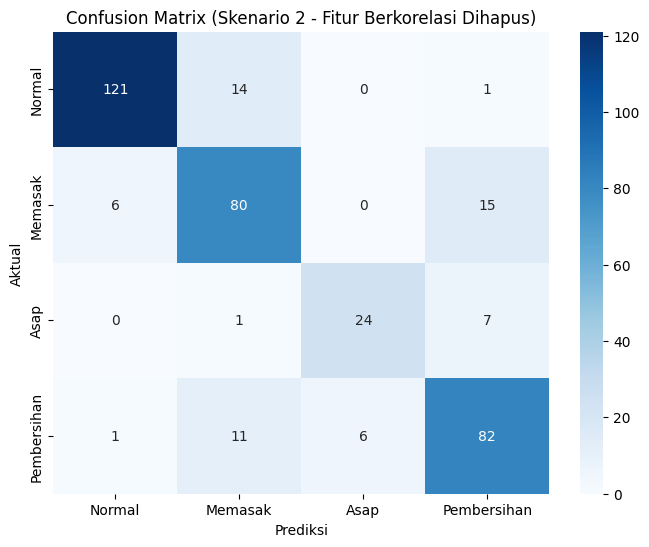

In [52]:
cm_scenario2 = confusion_matrix(y_test_reduced, y_pred_scenario2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_scenario2, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Skenario 2 - Fitur Berkorelasi Dihapus)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [53]:
print("\nConfusion Matrix (Skenario 2 - Fitur Berkorelasi Dihapus):")
print("Kolom: Prediksi (Normal, Memasak, Asap, Pembersihan)")
print("Baris: Aktual (Normal, Memasak, Asap, Pembersihan)")
print(cm_scenario2)
for i, actual in enumerate(class_names):
    print(f"\nAktual: {actual}")
    for j, predicted in enumerate(class_names):
        print(f"  Prediksi {predicted}: {cm_scenario2[i][j]} sampel")


Confusion Matrix (Skenario 2 - Fitur Berkorelasi Dihapus):
Kolom: Prediksi (Normal, Memasak, Asap, Pembersihan)
Baris: Aktual (Normal, Memasak, Asap, Pembersihan)
[[121  14   0   1]
 [  6  80   0  15]
 [  0   1  24   7]
 [  1  11   6  82]]

Aktual: Normal
  Prediksi Normal: 121 sampel
  Prediksi Memasak: 14 sampel
  Prediksi Asap: 0 sampel
  Prediksi Pembersihan: 1 sampel

Aktual: Memasak
  Prediksi Normal: 6 sampel
  Prediksi Memasak: 80 sampel
  Prediksi Asap: 0 sampel
  Prediksi Pembersihan: 15 sampel

Aktual: Asap
  Prediksi Normal: 0 sampel
  Prediksi Memasak: 1 sampel
  Prediksi Asap: 24 sampel
  Prediksi Pembersihan: 7 sampel

Aktual: Pembersihan
  Prediksi Normal: 1 sampel
  Prediksi Memasak: 11 sampel
  Prediksi Asap: 6 sampel
  Prediksi Pembersihan: 82 sampel


## Prediksi dengan Data Dummy Baru dan Perbandingan Model

In [56]:
### Langkah 1: Membuat Data Dummy Baru

# Contoh data dummy:
# - Baris 1: Kondisi normal (nilai sensor rendah)
# - Baris 2: Kondisi memasak (nilai MQ2/MQ9/MQ135/MQ137/MQ138 tinggi, MG_811 sedang)
# - Baris 3: Kondisi asap (nilai MQ2/MQ9/MQ135/MQ137/MQ138 sangat tinggi, MG_811 rendah)
# - Baris 4: Kondisi pembersihan (nilai MQ2/MQ9/MQ135/MQ137/MQ138 sedang, MG_811 tinggi)
dummy_data = pd.DataFrame({
    'MQ2': [300, 800, 1200, 600],
    'MQ9': [350, 850, 1300, 650],
    'MQ135': [800, 1500, 1700, 1200],
    'MQ137': [1400, 1800, 1900, 1650],
    'MQ138': [800, 1600, 1900, 1300],
    'MG_811': [2000, 2300, 1850, 2500]
})

print("\nData Dummy Baru untuk Prediksi:\n", dummy_data)

### Langkah 2: Prediksi Menggunakan `model_scenario1` (Semua Fitur)
# Data dummy akan diskalakan menggunakan `scaler_full` yang telah dilatih pada data lengkap, kemudian diprediksi oleh `model_scenario1`.
dummy_data_scaled_full = scaler_full.transform(dummy_data)
predictions_scenario1 = model_scenario1.predict(dummy_data_scaled_full)

print("\nPrediksi dari Model Skenario 1 (Semua Fitur):", predictions_scenario1)

### Langkah 3: Prediksi Menggunakan `model_scenario2` (Fitur Dikurangi)
# Data dummy akan dikurangi fiturnya menjadi hanya 'MQ2' dan 'MG_811', kemudian diskalakan menggunakan `scaler_reduced` dan diprediksi oleh `model_scenario2`.
dummy_data_reduced = dummy_data[['MQ2', 'MG_811']] # Mengambil subset fitur
dummy_data_scaled_reduced = scaler_reduced.transform(dummy_data_reduced)
predictions_scenario2 = model_scenario2.predict(dummy_data_scaled_reduced)

print("\nPrediksi dari Model Skenario 2 (Fitur Dikurangi):", predictions_scenario2)

### Langkah 4: Perbandingan Hasil Prediksi
# Hasil prediksi dari kedua model akan dibandingkan dalam satu tabel untuk melihat perbedaannya.
activity_labels = {1: 'Normal', 2: 'Memasak', 3: 'Asap', 4: 'Pembersihan'}

comparison_df = pd.DataFrame({
    'Data Dummy Index': dummy_data.index,
    'Prediksi Model Skenario 1 (Semua Fitur)': [activity_labels[p] for p in predictions_scenario1],
    'Prediksi Model Skenario 2 (Fitur Dikurangi)': [activity_labels[p] for p in predictions_scenario2]
})

print("\nPerbandingan Prediksi Model:\n", comparison_df)


Data Dummy Baru untuk Prediksi:
     MQ2   MQ9  MQ135  MQ137  MQ138  MG_811
0   300   350    800   1400    800    2000
1   800   850   1500   1800   1600    2300
2  1200  1300   1700   1900   1900    1850
3   600   650   1200   1650   1300    2500

Prediksi dari Model Skenario 1 (Semua Fitur): [1 4 3 2]

Prediksi dari Model Skenario 2 (Fitur Dikurangi): [1 4 3 2]

Perbandingan Prediksi Model:
    Data Dummy Index Prediksi Model Skenario 1 (Semua Fitur)  \
0                 0                                  Normal   
1                 1                             Pembersihan   
2                 2                                    Asap   
3                 3                                 Memasak   

  Prediksi Model Skenario 2 (Fitur Dikurangi)  
0                                      Normal  
1                                 Pembersihan  
2                                        Asap  
3                                     Memasak  
